In [1]:
import pandas as pd
import numpy as np

In [2]:
medical=pd.read_excel("new_df.xlsx")

In [3]:
medical

,Sn No,Patient ID,Age,Gender,Marital Status,Education Level,Occupation,Socioeconomic Status,Residence (Urban/Rural),Family Type (Nuclear/Joint),...,GHQ-12 Score,HDRS Score,HARS Score,PSLE Events,ICD-10 Diag0sis,GHQ,Depression,Anxiety,Symptoms,Subtypes
0,1,CD001,18,Female,1,1,2,NaN,0,1,...,8,25,18,22,F44.2,1,1,1,0,4
1,2,CD002,20,Female,1,2,2,NaN,0,1,...,0,36,40,15,F44.0,0,1,1,1,2
2,3,CD003,29,Female,1,1,2,NaN,1,0,...,6,49,21,10,F44.1,1,1,1,1,1
3,4,CD004,24,Male,1,1,5,NaN,0,1,...,8,45,0,11,F44.2,1,1,0,0,2
4,5,CD005,48,Female,1,2,2,NaN,0,0,...,6,44,7,41,F44.2,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,CD071,20,Female,2,2,2,NaN,0,1,...,11,47,49,53,F44.1,1,1,1,3,5
71,72,CD072,24,Female,0,1,1,NaN,1,0,...,3,16,6,2,F44.4,0,1,0,2,5
72,73,CD073,21,Female,1,0,5,NaN,0,1,...,10,41,43,45,F44.2,1,1,1,3,1
73,74,CD074,22,Female,1,2,4,NaN,1,0,...,8,36,21,29,F44.3,1,1,1,3,7


In [4]:
medical["Age"].max()

np.int64(53)

In [5]:
medical["Age"].min()

np.int64(18)

In [6]:
age=medical["Age"]
a=0
b=0
c=0
d=0
e=0

for i in age:
    if i in range(18,25):
        a+=1
    elif i in range(25,32):
        b+=1
    elif i in range (32,39):
        c+=1
    elif i in range (39,46):
        d+=1
    elif i in range(46,54):
        e+=1
print(a,b,c,d,e)

40 20 7 5 3


In [7]:
df = pd.DataFrame(
    {
    "age":["18-24","25-31","32-38","39-45","46-53"],
    "count":[a,b,c,d,e]
})
df["percentage"]=df["count"]/75*100
df

,age,count,percentage
0,18-24,40,53.333333
1,25-31,20,26.666667
2,32-38,7,9.333333
3,39-45,5,6.666667
4,46-53,3,4.000000


In [8]:
def agecount(num):
    m=0
    check=medical["Age"]
    for i in check:
        if i==num:
            m+=1
        else:
            continue

    return f"total number of patient of age {num} is {m}."

In [9]:
medical["Gender"].value_counts()
df2= pd.DataFrame({
    "gender": ["male","female"],
    "count":  [13,62]

})
df2["percentage"]=list(map(lambda x:x/len(medical)*100,df2["count"]))
df2

,gender,count,percentage
0,male,13,17.333333
1,female,62,82.666667


In [10]:
residance_count=medical["Residence (Urban/Rural)"].value_counts().reset_index()
residance_count["Residence (Urban/Rural)"]=residance_count["Residence (Urban/Rural)"].replace(0,"urban")
residance_count["Residence (Urban/Rural)"]=residance_count["Residence (Urban/Rural)"].replace(1,"rural")
residance_count["percentage"]=residance_count["count"]/len(medical)*100
residance_count

,Residence (Urban/Rural),count,percentage
0,urban,40,53.333333
1,rural,35,46.666667


In [11]:
family_count=medical["Family Type (Nuclear/Joint)"].value_counts().reset_index()
family_count["Family Type (Nuclear/Joint)"]=family_count["Family Type (Nuclear/Joint)"].replace(0,"Nuclear")
family_count["Family Type (Nuclear/Joint)"]=family_count["Family Type (Nuclear/Joint)"].replace(1,"Joint")
family_count["percentage"]=family_count["count"]/len(medical)*100
family_count


,Family Type (Nuclear/Joint),count,percentage
0,Joint,44,58.666667
1,Nuclear,31,41.333333


In [12]:
pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install statsmodes

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodes (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for statsmodes


In [14]:
from scipy import stats
from scipy.stats import ttest_ind,ttest_rel,chi2_contingency

In [15]:
import matplotlib.pyplot as plt

In [16]:
medical.describe()

,Sn No,Age,Marital Status,Education Level,Occupation,Socioeconomic Status,Residence (Urban/Rural),Family Type (Nuclear/Joint),Religion,Duration of Illness (months),...,Outcome/Improvement (Y/N),GHQ-12 Score,HDRS Score,HARS Score,PSLE Events,GHQ,Depression,Anxiety,Symptoms,Subtypes
count,75.000000,75.000000,75.0000,75.000000,75.000000,0.0,75.000000,75.000000,66.000000,0.0,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0,75.000000,75.000000,75.000000
mean,38.000000,27.120000,0.8800,1.226667,2.853333,NaN,0.466667,0.586667,0.984848,NaN,...,0.600000,7.280000,34.946667,26.213333,29.413333,0.800000,1.0,0.733333,1.520000,4.266667
std,21.794495,7.971164,0.4921,0.745678,1.362563,NaN,0.502247,0.495748,0.667773,NaN,...,0.493197,2.897156,10.383060,16.567057,18.441356,0.402694,0.0,0.445195,1.119363,2.355748
min,1.000000,18.000000,0.0000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,15.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,19.500000,21.500000,1.0000,1.000000,2.000000,NaN,0.000000,0.000000,1.000000,NaN,...,0.000000,5.000000,26.500000,13.000000,10.000000,1.000000,1.0,0.000000,0.500000,2.000000
50%,38.000000,24.000000,1.0000,1.000000,2.000000,NaN,0.000000,1.000000,1.000000,NaN,...,1.000000,7.000000,36.000000,20.000000,29.000000,1.000000,1.0,1.000000,2.000000,5.000000
75%,56.500000,30.000000,1.0000,2.000000,4.000000,NaN,1.000000,1.000000,1.000000,NaN,...,1.000000,10.000000,44.000000,43.500000,46.500000,1.000000,1.0,1.000000,2.000000,6.000000
max,75.000000,53.000000,2.0000,2.000000,5.000000,NaN,1.000000,1.000000,2.000000,NaN,...,1.000000,12.000000,51.000000,55.000000,59.000000,1.000000,1.0,1.000000,3.000000,7.000000


In [17]:
sample_1= medical.sample(n=7,random_state=1)

In [18]:
t_value,p_value=ttest_ind(medical["Age"],sample_1["Age"])
print(t_value,p_value)
#p_value>0.05 hence both batch are same


0.870910621719305 0.3864089296818577


In [19]:
t_value,p_value=ttest_ind(medical["GHQ-12 Score"],sample_1["GHQ-12 Score"])
print(t_value,p_value)

-0.4979824520246163 0.6198626186187859


In [20]:
t_value,p_value=ttest_ind(medical["HARS Score"],sample_1["HARS Score"])
print(t_value,p_value)

-0.6768130355082184 0.5004769338642243


In [21]:
t_value,p_value=ttest_ind(medical["HDRS Score"],sample_1["HDRS Score"])
print(t_value,p_value)

-0.5323083211346554 0.5959878210137795


In [22]:
len(medical)

75

In [23]:
medical["Age"].max()

np.int64(53)

In [24]:
def age_var(m):
    mean=27.120000
    variance=((m-mean)**2).sum()/len(medical)

    return variance
    

In [25]:
import seaborn as sns

<Axes: >

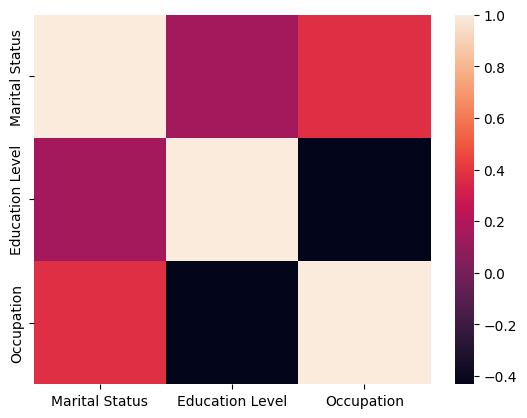

In [26]:
sns.heatmap(medical.iloc[:,4:7].corr())

In [27]:
age_var(medical["Age"])

np.float64(62.69226666666667)

{'whiskers': [<matplotlib.lines.Line2D at 0x2787e9b5310>,
 'caps': [<matplotlib.lines.Line2D at 0x2787e9b5590>,
 'boxes': [<matplotlib.lines.Line2D at 0x2787e9b51d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2787e9b5810>],
 'fliers': [<matplotlib.lines.Line2D at 0x2787e9b5950>],
 'means': []}

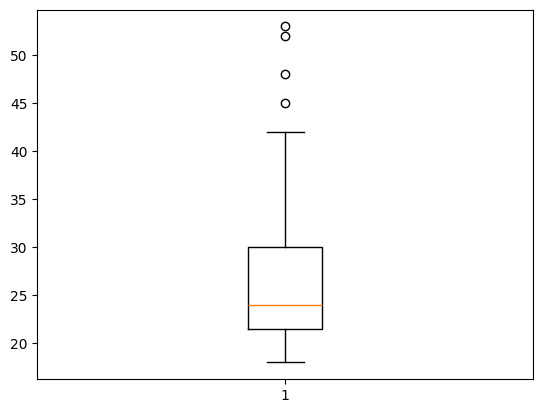

In [28]:
plt.boxplot(medical["Age"])

In [29]:
medical.columns.slice_indexer()

slice(0, 29, None)

In [30]:
medical.iloc[:,20:23].corr()

,HDRS Score,HARS Score,PSLE Events
HDRS Score,1.000000,0.849529,0.888301
HARS Score,0.849529,1.000000,0.909148
PSLE Events,0.888301,0.909148,1.000000


<Axes: >

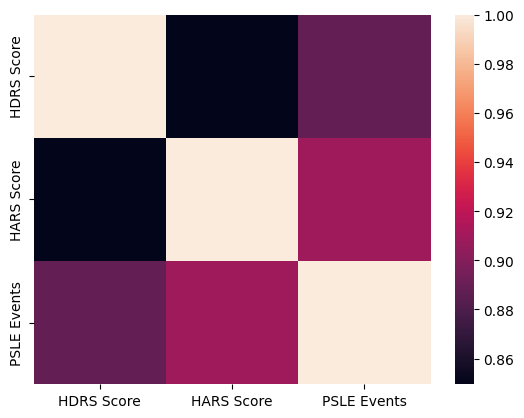

In [31]:
sns.heatmap(medical.iloc[:,20:23].corr())

In [32]:
medical

,Sn No,Patient ID,Age,Gender,Marital Status,Education Level,Occupation,Socioeconomic Status,Residence (Urban/Rural),Family Type (Nuclear/Joint),...,GHQ-12 Score,HDRS Score,HARS Score,PSLE Events,ICD-10 Diag0sis,GHQ,Depression,Anxiety,Symptoms,Subtypes
0,1,CD001,18,Female,1,1,2,NaN,0,1,...,8,25,18,22,F44.2,1,1,1,0,4
1,2,CD002,20,Female,1,2,2,NaN,0,1,...,0,36,40,15,F44.0,0,1,1,1,2
2,3,CD003,29,Female,1,1,2,NaN,1,0,...,6,49,21,10,F44.1,1,1,1,1,1
3,4,CD004,24,Male,1,1,5,NaN,0,1,...,8,45,0,11,F44.2,1,1,0,0,2
4,5,CD005,48,Female,1,2,2,NaN,0,0,...,6,44,7,41,F44.2,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,CD071,20,Female,2,2,2,NaN,0,1,...,11,47,49,53,F44.1,1,1,1,3,5
71,72,CD072,24,Female,0,1,1,NaN,1,0,...,3,16,6,2,F44.4,0,1,0,2,5
72,73,CD073,21,Female,1,0,5,NaN,0,1,...,10,41,43,45,F44.2,1,1,1,3,1
73,74,CD074,22,Female,1,2,4,NaN,1,0,...,8,36,21,29,F44.3,1,1,1,3,7


In [35]:
pd.crosstab(medical["Gender"],medical["Family Type (Nuclear/Joint)"])

Family Type (Nuclear/Joint),0,1
Gender,,
Female,19,43
Male,12,1
